In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = './transform_data'

In [4]:
# load and transform district info & population
districts = pd.read_csv(f'{DATA_DIR}/districts.csv')
population = pd.read_csv(f'{DATA_DIR}/population.csv')
migration = pd.read_csv(f'{DATA_DIR}/migration.csv')

In [5]:
# Merge population & migration
population_migration = population.merge(migration, how='inner', on=['territory_id', 'gender', 'age_group']) \
    .rename(columns={'gender_value': 'population', 'value': 'migration'}) \
    [['territory_id', 'age_group', 'gender', 'population', 'migration']]

In [6]:
# Check data
population_migration.loc[
    (population_migration['territory_id'] == 1953) & 
    (population_migration['age_group'] == 'Всего')
, 'migration'].sum() \
== \
population_migration.loc[
    (population_migration['territory_id'] == 1953) & 
    (population_migration['age_group'] != 'Всего')
, 'migration'].sum()

np.True_

In [7]:
# Calc relative migration
population_migration['migration_relative'] = population_migration['migration'] * 100 / population_migration['population']

In [8]:
# Save data
population_migration.to_csv(f'{DATA_DIR}/relative_migration.csv')

In [ ]:
population_migration_wo_gender = population_migration.pivot_table(
    index=['territory_id', 'age_group'], 
    values=['population', 'migration'], 
    aggfunc='sum').reset_index()

In [10]:
population_migration_wo_gender['migration_relative'] = population_migration_wo_gender['migration'] * 100 / population_migration_wo_gender['population']

In [11]:
salary = pd.read_csv(f'{DATA_DIR}/salary.csv')

In [12]:
salary_migration = salary.loc[(salary['okved_name'] == 'Все отрасли') & (salary['year'] == 2023), ['territory_id', 'value']] \
.merge(
    population_migration_wo_gender[population_migration_wo_gender['age_group'] == 'Всего'],
    how='inner', on='territory_id')

In [13]:
salary_migration

,territory_id,value,age_group,migration,population,migration_relative
0,1953,137449.9,Всего,-1336.0,207841.0,-0.642799
1,1954,81574.6,Всего,-134.0,9868.0,-1.357925
2,1955,92166.7,Всего,146.0,20975.0,0.696067
3,1956,89080.2,Всего,300.0,22145.0,1.354708
4,1957,112483.4,Всего,-30.0,39675.0,-0.075614
5,1959,81758.7,Всего,-160.0,6778.0,-2.360578
6,1960,94381.6,Всего,168.0,15099.0,1.112656
7,1961,164427.7,Всего,-482.0,11222.0,-4.295135
8,1962,109610.5,Всего,-370.0,21086.0,-1.754719
9,1963,78505.5,Всего,10.0,20376.0,0.049077


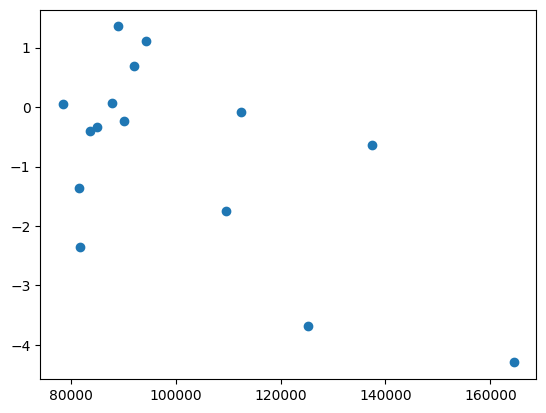

In [14]:
plt.scatter(data=salary_migration, x='value', y='migration_relative')
plt.show()

In [15]:
salary_migration[['value', 'migration_relative']].corr()

,value,migration_relative
value,1.000000,-0.615311
migration_relative,-0.615311,1.000000


In [17]:
salary['okved_name'].unique()

array(['Водоснабжение', 'Все отрасли',
       'Гос. управление и военн. безопасность',
       'Административная деятельность', 'Здравоохранение', 'ИТ и связь',
       'Спорт и досуг', 'Гостиницы и общепит', 'Операции с недвижимостью',
       'Научная и проф. деятельность', 'Финансы и страхование',
       'Услуги ЖКХ', 'Обрабатывающие производства', 'Образование',
       'Прочие услуги', 'Сельское хозяйство', 'Строительство', 'Торговля',
       'Транспортировка и хранение'], dtype=object)

In [18]:
salary

,Unnamed: 0,territory_id,year,okved_name,okved_letter,value,municipal_district_name
0,0,1953,2023,Водоснабжение,E,89172.6,городской округ город Южно-Сахалинск
1,1,1953,2023,Все отрасли,0,137449.9,городской округ город Южно-Сахалинск
2,2,1953,2023,Гос. управление и военн. безопасность,O,132509.1,городской округ город Южно-Сахалинск
3,3,1953,2023,Административная деятельность,N,224014.7,городской округ город Южно-Сахалинск
4,4,1953,2023,Здравоохранение,Q,107373.9,городской округ город Южно-Сахалинск
...,...,...,...,...,...,...,...
675,675,1970,2024,Прочие услуги,S,NaN,городской округ Южно-Курильский
676,676,1970,2024,Сельское хозяйство,A,185743.8,городской округ Южно-Курильский
677,677,1970,2024,Строительство,F,164848.7,городской округ Южно-Курильский
678,678,1970,2024,Торговля,G,107409.2,городской округ Южно-Курильский
